In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [9]:
#data = {
#    'job_skills': ['python', 'sql', 'java', 'c++', 'c#', 'javascript', 'html', 'css', 'php', 'ruby'],
#    'skill_count': [30, 25, 20, 15, 10, 5, 4, 3, 2, 1],
#    'skill_pay': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
#}

#df_Scatter = pd.DataFrame(data) #Así es como lo tratas como una DATAFRAME, aunque yo le hubiese puesto un nombre diferente.

## Funcionaba cuando solo se llamaba df

#df.plot(kind='scatter', x='skill_count', y='skill_pay')
#plt.title('Job for each skill with count and pay per skill')
#plt.xlabel('Count of Skills')
#plt.ylabel('Pay per Skill')
#plt.show()


In [52]:
#df = df[df['job_title_short'] == 'Data Analyst']

In [11]:
df_exploded = df.explode('job_skills')



In [39]:
skills_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'), # en la izquierda esta lo que quieres que cuente, a la derecha esta el agg method que basicamente es que quieres que haga con el. Aquí solo le digo que los cuente nada más. Abajo le pediré que me de la media de los salarios de data analyst
    median_salary=('salary_year_avg', 'median')
)

skills_stats = skills_stats.sort_values(by='skill_count', ascending=False).head(10)

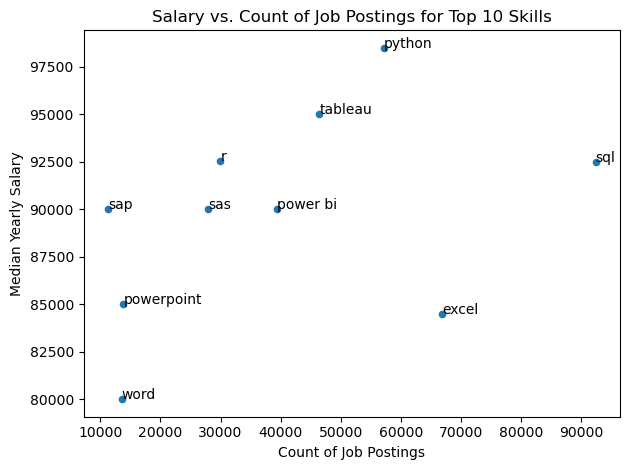

In [62]:
skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.tight_layout() #hace que se abra un poco mas el grafico para que se muestre mejor

for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt)


plt.show()

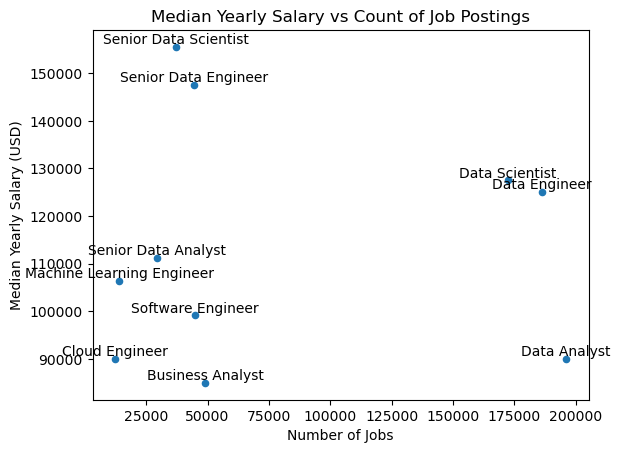

In [54]:
# Group data by job title and calculate average yearly salary and job count
job_title_stats = df.groupby('job_title_short').agg(
 median_salary_year_avg=('salary_year_avg', 'median'),
 job_count=('job_title_short', 'count')
).dropna()

# Plotting the results
job_title_stats.plot(kind='scatter', x='job_count', y='median_salary_year_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Median Yearly Salary vs Count of Job Postings')

# Adding job title labels to each point
for i in range(len(job_title_stats)):
 job_count = job_title_stats['job_count'].iloc[i]
 mean_salary = job_title_stats['median_salary_year_avg'].iloc[i]
 job_title = job_title_stats.index[i]
 plt.text(job_count, mean_salary, job_title, ha='center', va='bottom')

plt.show()

top_countries = df.groupby('job_country').agg(
 median_salary_year_avg=('salary_year_avg', 'median'),
 job_country_count=('job_country', 'count')
).dropna()

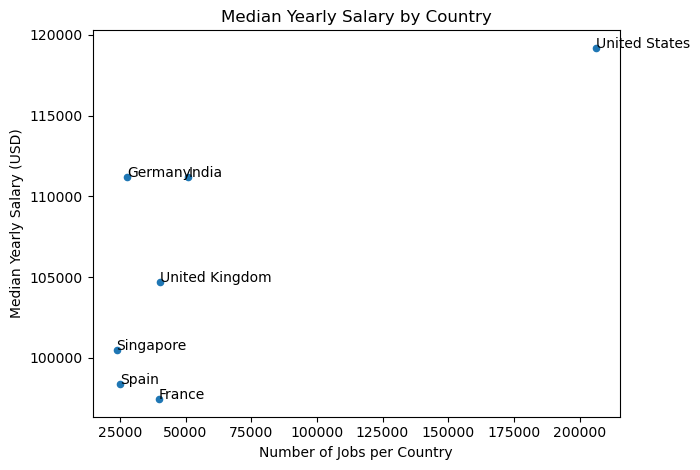

In [64]:
top_countries = df.groupby('job_country').agg(
 job_country_counts=('job_country', 'count'),
 median_salary_year_avg=('salary_year_avg', 'median')
).dropna()

top_countries = top_countries.sort_values(by='job_country_counts', ascending=False).head(7)

top_countries.plot(kind='scatter', x='job_country_counts', y='median_salary_year_avg')
plt.xlabel('Number of Jobs per Country')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Median Yearly Salary by Country')
plt.tight_layout()

for i, txt in enumerate(top_countries.index):
    plt.text(top_countries['job_country_counts'].iloc[i], top_countries['median_salary_year_avg'].iloc[i], txt)

plt.show()


# skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
# plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
# plt.xlabel('Count of Job Postings')
# plt.ylabel('Median Yearly Salary')
# plt.tight_layout() #hace que se abra un poco mas el grafico para que se muestre mejor

# for i, txt in enumerate(skills_stats.index):
#     plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt)


# plt.show()

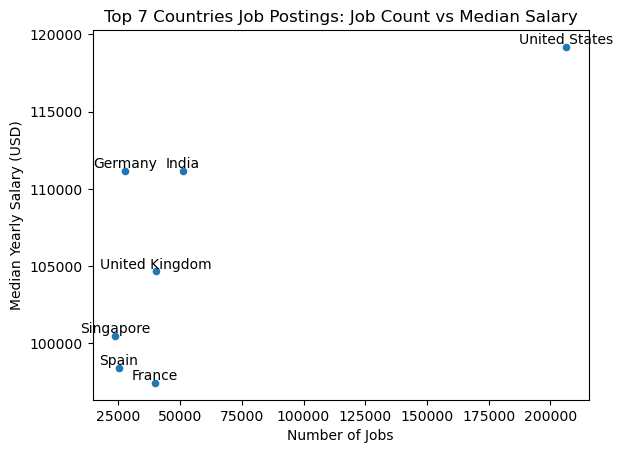

In [65]:
# Igual me salió pero luke lo hizo de otra forma:




# Group data by country and calculate median hourly salary and job count
country_stats = df.groupby('job_country').agg(
 median_salary_year_avg=('salary_year_avg', 'median'),
 job_count=('job_country', 'count')
).dropna()

# Sort by job count in descending order and take the top 7
top_countries = country_stats.sort_values(by='job_count', ascending=False).head(7)

# Plotting the results
top_countries.plot(kind='scatter', x='job_count', y='median_salary_year_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Top 7 Countries Job Postings: Job Count vs Median Salary')

# Adding country labels to each point
for i in range(len(top_countries)):
 job_count = top_countries['job_count'].iloc[i]
 mean_salary = top_countries['median_salary_year_avg'].iloc[i]
 country = top_countries.index[i]
 plt.text(job_count, mean_salary, country, ha='center', va='bottom')

plt.show()

In [3]:
#job_info_scatter = df[(df['job_title_short'] == 'Data Analyst') | (df['job_title_short'] == 'Data Scientist')] | (df['job_title_short'] == 'Data Engineer')
                



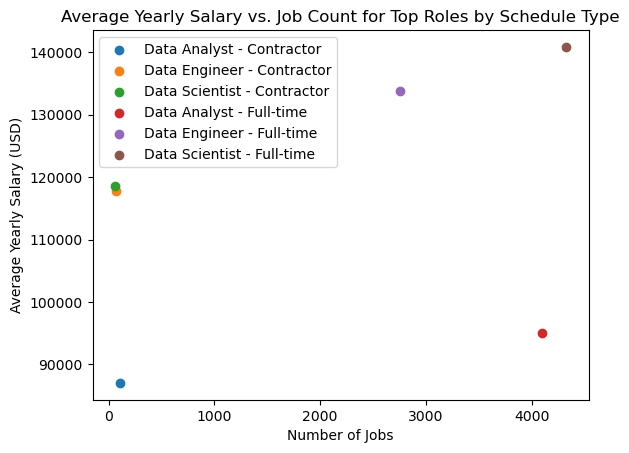

In [5]:
# Define specific job titles to include
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Filter US jobs for only full-time and part-time roles and specific job titles, then drop rows with missing salary data
us_jobs_df = df[
 (df['job_country'] == 'United States') &
 (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) &
 (df['job_title_short'].isin(target_job_titles))
].dropna(subset=['salary_year_avg']).copy()

# Group by job schedule type and job title, calculate mean yearly salary and job count
stats = us_jobs_df.groupby(['job_schedule_type', 'job_title_short']).agg(
 mean_salary_year_avg=('salary_year_avg', 'mean'),
 job_count=('job_title_short', 'count')
).dropna()

# Reset the index to make plotting easier
stats.reset_index(inplace=True)

# Combine title and type into one value for labels
stats['job_title_type'] = stats['job_title_short'] + ' - ' + stats['job_schedule_type']

# Plot using plt.scatter()
for job_title_type in stats['job_title_type'].unique():
 subset = stats[stats['job_title_type'] == job_title_type]
 plt.scatter(subset['job_count'], subset['mean_salary_year_avg'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()

#Luke

In [6]:
stats

,job_schedule_type,job_title_short,mean_salary_year_avg,job_count,job_title_type
0,Contractor,Data Analyst,87027.197142,111,Data Analyst - Contractor
1,Contractor,Data Engineer,117772.326225,74,Data Engineer - Contractor
2,Contractor,Data Scientist,118568.074155,61,Data Scientist - Contractor
3,Full-time,Data Analyst,95072.545202,4097,Data Analyst - Full-time
4,Full-time,Data Engineer,133804.432239,2759,Data Engineer - Full-time
5,Full-time,Data Scientist,140848.379828,4325,Data Scientist - Full-time
